# SALARY PROJECT

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.isnull().sum() # No null values found

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df['rank'].unique()


array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [7]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [8]:
df['sex'].unique()
# Features rank,discipline,sex are text data hence applying Ordinal Encoder to tranform into categorical data

array(['Male', 'Female'], dtype=object)

In [9]:
ord_enc=OrdinalEncoder(categories=[["AsstProf","AssocProf","Prof"],["A","B"],["Male","Female"]])
df[["rank","discipline","sex"]]=ord_enc.fit_transform(df[["rank","discipline","sex"]])

In [10]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,0.0,139750
1,2.0,1.0,20,16,0.0,173200
2,0.0,1.0,4,3,0.0,79750
3,2.0,1.0,45,39,0.0,115000
4,2.0,1.0,40,41,0.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,0.0,103106
393,2.0,0.0,31,19,0.0,150564
394,2.0,0.0,42,25,0.0,101738
395,2.0,0.0,25,15,0.0,95329


# Visualization of dataset

# COUNT PLOT

<AxesSubplot:xlabel='rank', ylabel='count'>

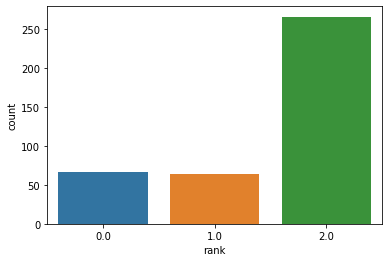

In [11]:
sns.countplot(df["rank"])
#rank feature is imbalanced in nature

<AxesSubplot:xlabel='discipline', ylabel='count'>

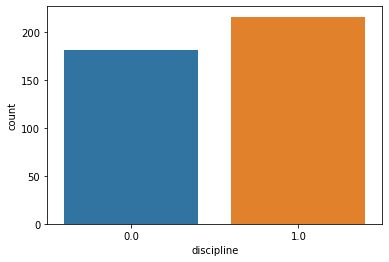

In [12]:
sns.countplot(df["discipline"])
#discpline feature is balanced in nature

<AxesSubplot:xlabel='sex', ylabel='count'>

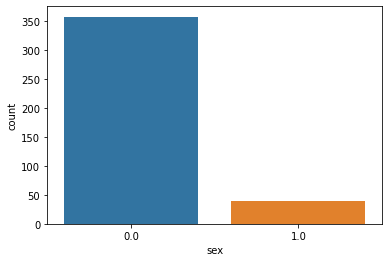

In [13]:
sns.countplot(df["sex"])
#sex feature is highly imbalanced

In [14]:
#Features rank and sex are imbalanced in nature hence applying following techniques
    #1. Check for Corelation and drop the column
    #2. Check for skewness
    #3. To apply ensemble techniques for modeling for optimized sampling of data

# Pair plot

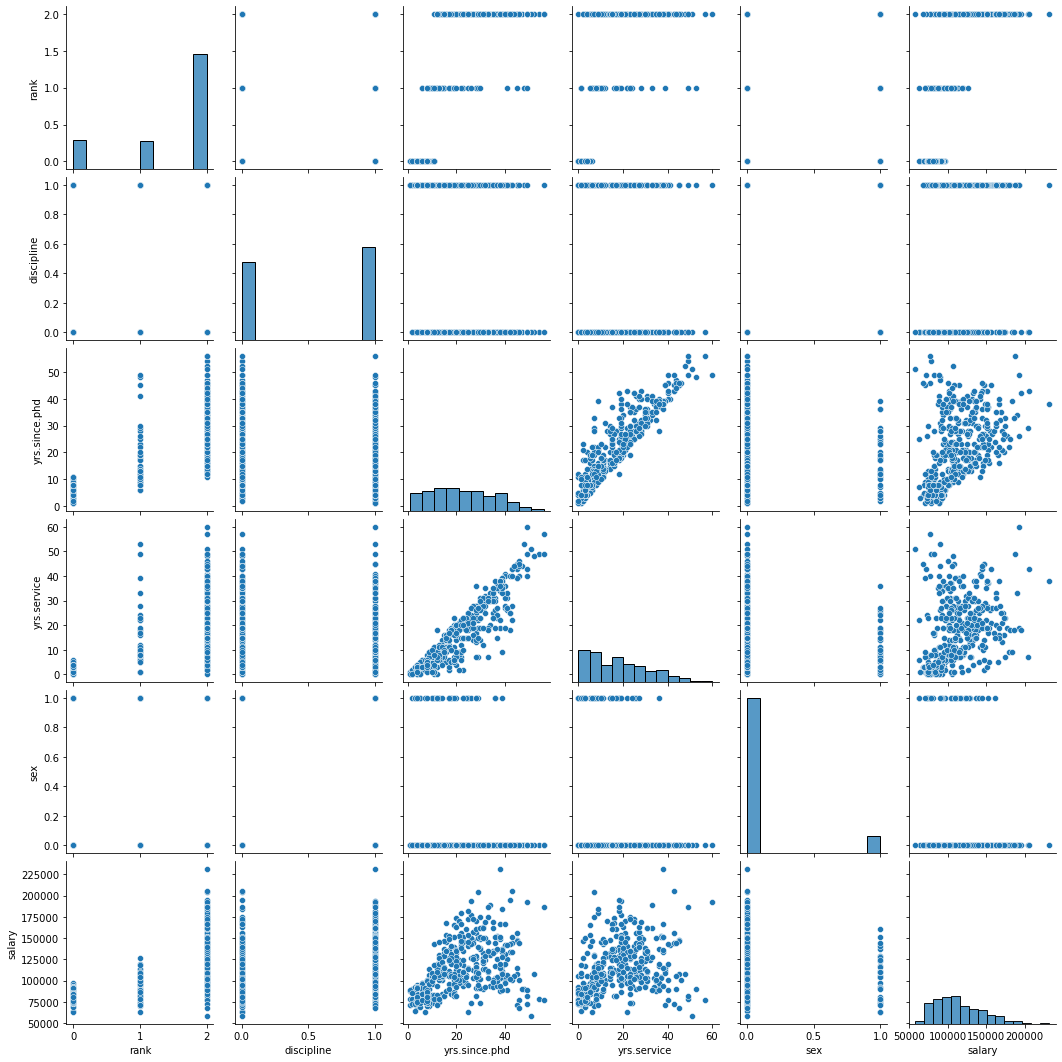

In [15]:
sns.pairplot(df)

# Scatter Plot

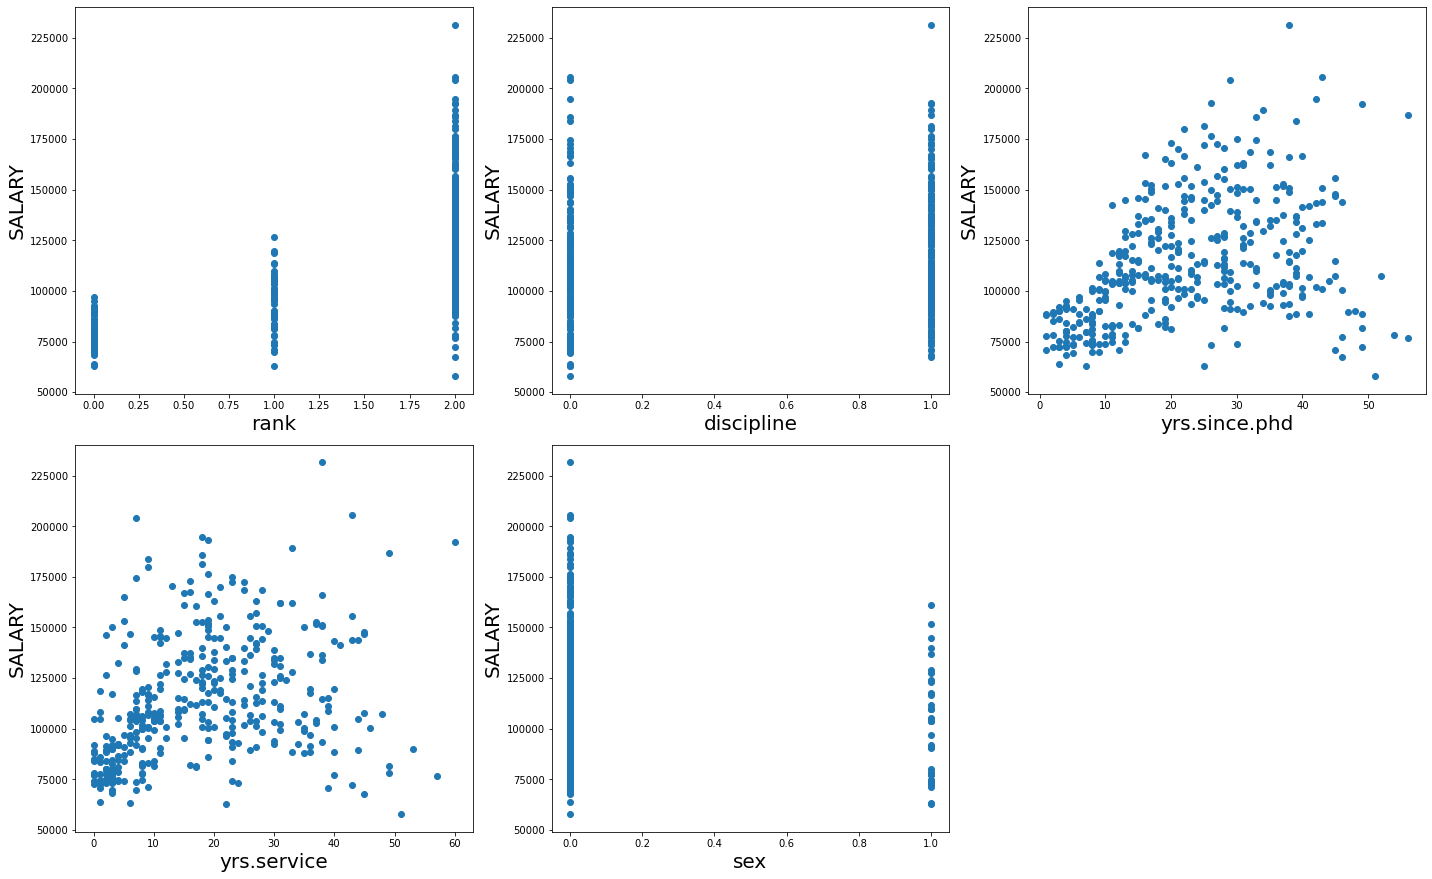

In [16]:
X=df.drop(columns='salary')
Y=df[['salary']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SALARY',fontsize=20)
    plotnumber+=1
plt.tight_layout()

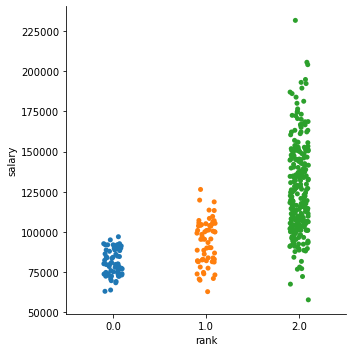

In [17]:
sns.catplot(x="rank", y="salary", data=df, jitter = True)

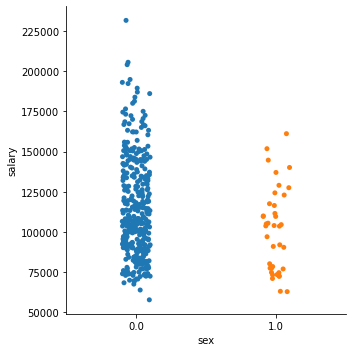

In [18]:
sns.catplot(x="sex", y="salary", data=df, jitter = True)

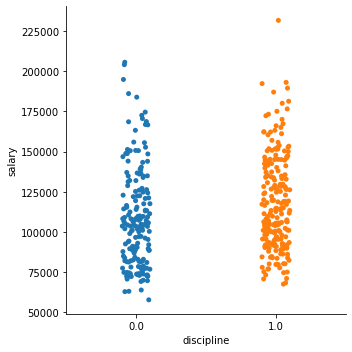

In [19]:
sns.catplot(x="discipline", y="salary", data=df, jitter = True)

In [20]:
# yrs.since.phd and yrs.service feature is having positive trend

# Box Plot

<AxesSubplot:>

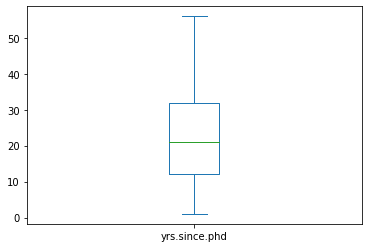

In [21]:
df["yrs.since.phd"].plot(kind="box")

<AxesSubplot:>

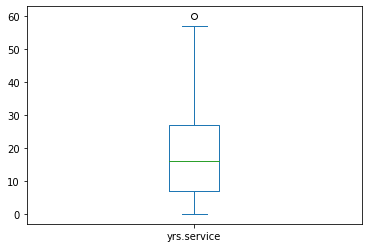

In [22]:
df['yrs.service'].plot(kind="box")  

In [23]:
#yrs.service has outlier and is right skewed

# Dist Plot

-1.1284741858358
-0.1770116626350349
0.29974153157458827
0.6481088240680348
2.6997084522172408
0.7118657337591157


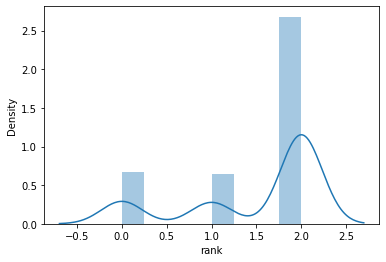

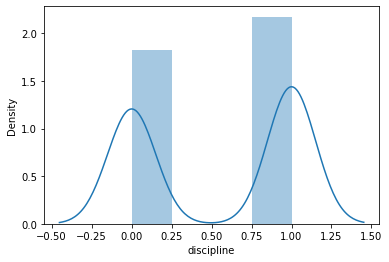

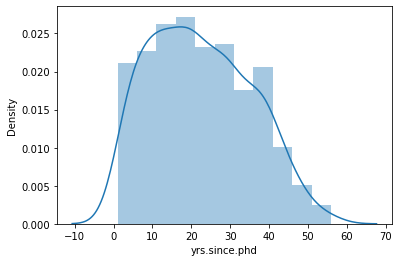

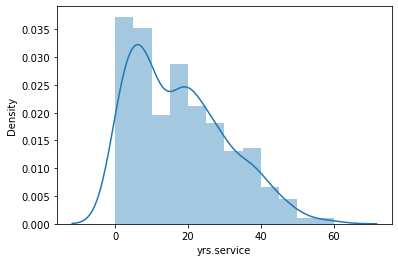

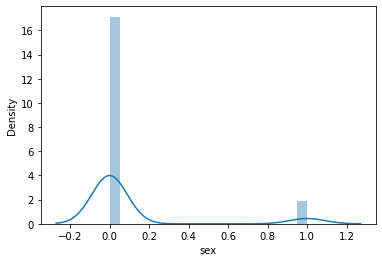

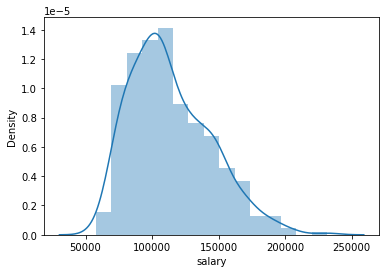

In [24]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [25]:
df.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

In [26]:
#yrs.service is slightly right skewed hence removing outlier using power tranformation

In [27]:
df["yrs.service"]=np.sqrt(df['yrs.service'])

# Rechecking for skewness and Outliers using Dist and Box plot

In [28]:
df.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service     -0.160353
sex              2.709958
salary           0.714568
dtype: float64

-1.1284741858358
-0.1770116626350349
0.29974153157458827
-0.15974634996880785
2.6997084522172408
0.7118657337591157


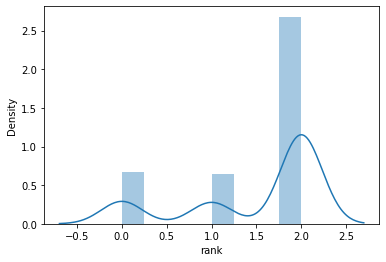

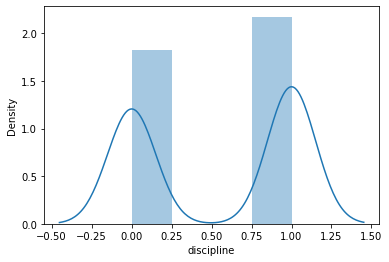

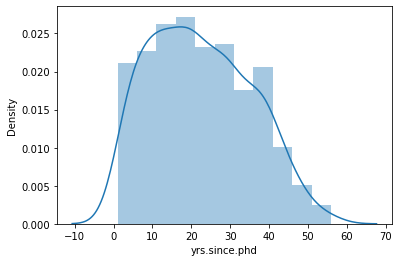

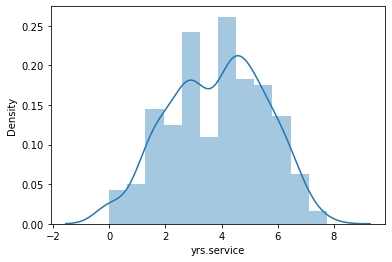

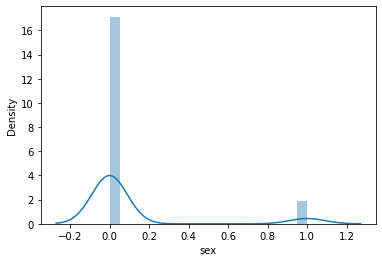

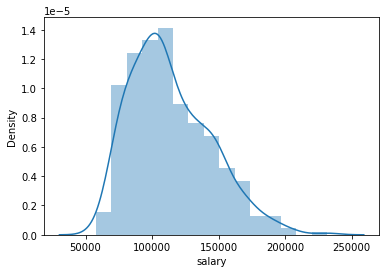

In [29]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

<AxesSubplot:>

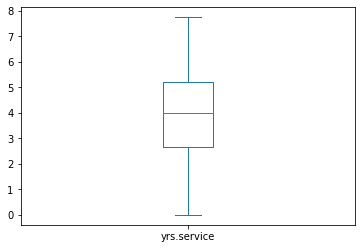

In [30]:
df['yrs.service'].plot(kind="box")  

<AxesSubplot:>

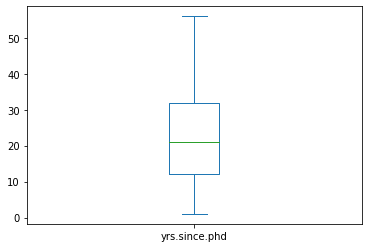

In [31]:
df["yrs.since.phd"].plot(kind="box")

In [32]:
# All outliers have been successfully removed 

# Heatmap and VIF

In [33]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.107365,0.700950,0.710596,0.138556,0.617224
discipline,0.107365,1.000000,0.218087,0.152398,0.003724,0.156084
yrs.since.phd,0.700950,0.218087,1.000000,0.899098,0.148788,0.419231
yrs.service,0.710596,0.152398,0.899098,1.000000,0.150439,0.402444
sex,0.138556,0.003724,0.148788,0.150439,1.000000,0.138610
salary,0.617224,0.156084,0.419231,0.402444,0.138610,1.000000


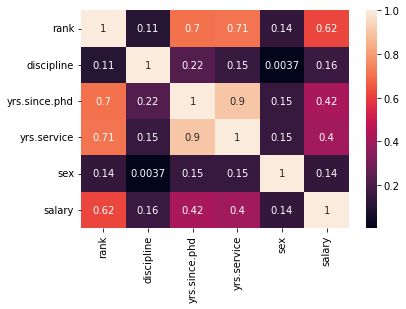

In [34]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [35]:
X=df.drop(columns='salary')
Y=df[['salary']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.112099,rank
1,1.063886,discipline
2,5.651152,yrs.since.phd
3,5.636445,yrs.service
4,1.026865,sex


In [36]:
# Corelation between features and label is moderate. yrs.sine.phd and yr.service are highly corelated indicated by vif
# As the feature sex is not highly correlated to the dependent variable and is highly imbalanced.Lets drop it.

In [37]:
 df.drop(columns="sex",inplace=True)

In [38]:
X=df.drop(columns='salary')
Y=df[['salary']]

# OLS

In [39]:
sm=smf.ols(formula='Y~X',data=df).fit()

In [40]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     76.44
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           7.17e-48
Time:                        11:39:41   Log-Likelihood:                -4544.8
No. Observations:                 397   AIC:                             9100.
Df Residuals:                     392   BIC:                             9120.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.071e+04   3389.262     20.863      0.000     6.4e+04    7.74e+04
X[0]        2.544e+04   2169.693     11.727      0.000    2.12e+04    2.97e+04
X[1]        1.445e+04   2370.441      6.095      0.000    9786.508    1.91e+04
X[2]         449.7893    211.433      2.127      0.034      34.106     865.473
X[3]       -3412.3741   1601.256     -2.131      0.034   -6560.497    -264.251
==============================================================================
Omnibus:                       47.869   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.868
Skew:                           0.737   Prob(JB):                     2.75e-18
Kurtosis:                       4.649   Cond. No.                         84.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression Without Hyperparameter Tuning

In [48]:
scaler=StandardScaler() #Scaling
X_scaled=scaler.fit_transform(X)

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21) #Training Test split

In [50]:
lm=LinearRegression() # Applying Regression
lm.fit(X_train,Y_train) # Fitting the model

LinearRegression()

In [51]:
Y_pred=lm.predict(X_test) # Predicting the Test data
Y_pred_train=lm.predict(X_train) #Predicting the Train data

In [52]:
lm.score(X_train,Y_train)

0.43681685851327146

In [53]:
lm.score(X_test,Y_test)

0.44047473463768894

In [78]:
r2=round(r2_score(Y_test,Y_pred),3) #r2_score
r2

0.439

In [79]:
cross_scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.44399004, 0.46259165, 0.34961987, 0.50069937, 0.3655911 ])

In [80]:
round(cross_scores.mean(),3)

0.424

In [81]:
round(mean_absolute_error(Y_test,Y_pred),3) #MAE

17314.66

In [82]:
round(mean_squared_error(Y_test,Y_pred),3) #MSE

530943535.892

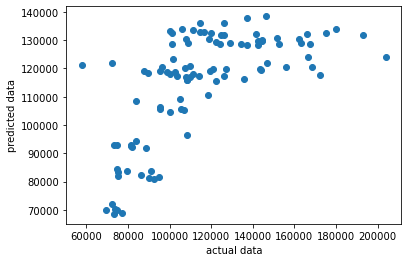

In [83]:
plt.scatter(Y_test,Y_pred) # Relation between actual and predicted data
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [84]:
# R-squared:	 0.440
# mean_absolute_error= 17314.66
# mean_squared_error= 530943535.892

# Linear Regression Using Ridge Regression

In [85]:
ridge=Ridge()

In [86]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

In [87]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [88]:
print(ridge_regressor.best_params_)

{'alpha': 5}


In [89]:
print(ridge_regressor.best_score_)

0.42521702992977284


In [90]:
Y_pred=ridge_regressor.predict(X_test)
Y_pred_train=ridge_regressor.predict(X_train)

In [91]:
ridge_regressor.score(X_train,Y_train)

0.4363974450864223

In [92]:
ridge_regressor.score(X_test,Y_test)

0.4387162560847844

In [94]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.439

In [70]:
cross_scores = cross_val_score(ridge_regressor, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.43906071, 0.46290032, 0.35560469, 0.50639245, 0.36212698])

In [95]:
round(cross_scores.mean(),3)

0.424

In [96]:
round(mean_absolute_error(Y_test,Y_pred),3)

17314.66

In [98]:
round(mean_squared_error(Y_test,Y_pred),3)

530943535.892

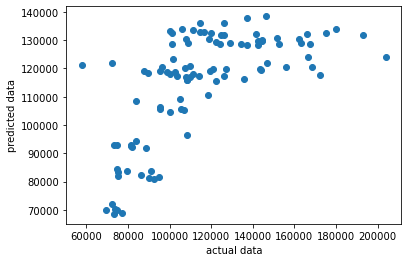

In [99]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [100]:
# R-squared:	 0.439
# mean_absolute_error= 17314.66
# mean_squared_error= 530943535.892

# Random Forest MODEL

In [101]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [103]:
Y_pred=rf.predict(X_test)

In [104]:
rf.score(X_train,Y_train)

0.8433464130822353

In [105]:
rf.score(X_test,Y_test)

0.4609593634460738

In [108]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.461

In [109]:
cross_scores = cross_val_score(rf, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.39516497, 0.33686407, 0.16524083, 0.43751605, 0.19374057])

In [112]:
round(cross_scores.mean(),3)

0.306

In [113]:
round(mean_absolute_error(Y_test,Y_pred),3)

16496.599

In [114]:
round(mean_squared_error(Y_test,Y_pred),3)

509902780.303

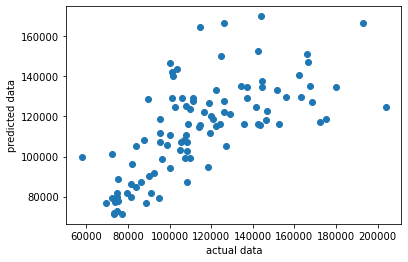

In [115]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [116]:
# R-squared:	 0.461
# mean_absolute_error= 16496.599
# mean_squared_error= 509902780.303

# RANDOM FOREST WITH HYPER PARAMETER TUNING

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [118]:
rf1=RandomForestRegressor()

In [119]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['squared_error', 'absolute_error', 'poisson']}

In [120]:
clf1=GridSearchCV(rf1,param_grid,cv=3,n_jobs=-1)

In [121]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [122]:
clf1.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 8}

In [123]:
Y_pred=clf1.predict(X_test)

In [124]:
clf1.score(X_train,Y_train)


0.46536829553675196

In [125]:
clf1.score(X_test,Y_test)

0.33221675614789326

In [129]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.332

In [126]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.31390855, 0.26821416, 0.20790013, 0.39654929, 0.28439574])

In [130]:
round(cross_scores.mean(),3)

0.294

In [131]:
round(mean_absolute_error(Y_test,Y_pred),3)

19665.508

In [133]:
round(mean_squared_error(Y_test,Y_pred),3)

631686202.467

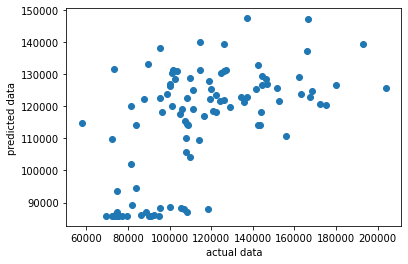

In [134]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [135]:
# R-squared:	 0.332
# mean_absolute_error= 19665.508
# mean_squared_error= 631686202.467

# GRADIENT BOOSTING

In [136]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [138]:
gbdt=GradientBoostingRegressor()

In [139]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [140]:
Y_pred=gbdt.predict(X_test)

In [141]:
gbdt.score(X_train,Y_train)

0.7408821057636115

In [145]:
gbdt.score(X_test,Y_test)

0.4700613892645146

In [146]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.47

In [147]:
cross_scores = cross_val_score(gbdt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.2962563 , 0.38708387, 0.20054347, 0.35467395, 0.2776855 ])

In [148]:
cross_scores.mean()

0.3032486175336393

In [149]:
round(mean_absolute_error(Y_test,Y_pred),3)

16359.84

In [150]:
round(mean_squared_error(Y_test,Y_pred),3)

501292764.738

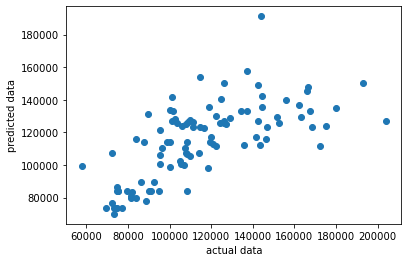

In [151]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [152]:
# R-squared:	 0.47
# mean_absolute_error= 16359.84
# mean_squared_error= 501292764.738

# GBDT WITH HYPER PARAMETER

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [154]:
gbdt1=GradientBoostingRegressor()

In [155]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}

In [156]:
clf1=GridSearchCV(gbdt1,param_grid,cv=3,n_jobs=-1)

In [157]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [158]:
clf1.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 6}

In [159]:
Y_pred=clf1.predict(X_test)

In [160]:
clf1.score(X_train,Y_train)


0.6338420614382798

In [161]:
clf1.score(X_test,Y_test)

0.4688391384418522

In [163]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.469

In [164]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.33641514, 0.43748895, 0.31532626, 0.52863465, 0.2726533 ])

In [165]:
cross_scores.mean()

0.37810366021499026

In [166]:
round(mean_absolute_error(Y_test,Y_pred),3)

16531.999

In [167]:
round(mean_squared_error(Y_test,Y_pred),3)

502448946.759

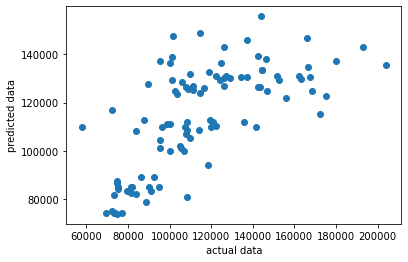

In [168]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [169]:
# R-squared:	 0.469
# mean_absolute_error= 16531.999
# mean_squared_error= 502448946.759

# KNN

In [170]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [171]:
scaler=StandardScaler()

In [172]:
X_scaled=scaler.fit_transform(X)

In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [174]:
knn=KNeighborsRegressor()

In [175]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [176]:
Y_pred=knn.predict(X_test)

In [177]:
knn.score(X_train,Y_train)

0.6059497668585726

In [178]:
knn.score(X_test,Y_test)

0.4939573570077195

In [181]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.494

In [182]:
cross_scores = cross_val_score(knn, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.48651491, 0.32569525, 0.3500206 , 0.45820552, 0.15349481])

In [183]:
cross_scores.mean()

0.35478621783348363

In [184]:
round(mean_absolute_error(Y_test,Y_pred),3)

16269.572

In [186]:
round(mean_squared_error(Y_test,Y_pred),3)

478688494.18

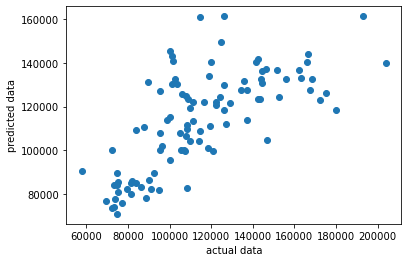

In [187]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [189]:
# R-squared:	 0.494
# mean_absolute_error= 16269.572
# mean_squared_error= 478688494.18

# KNN MODEL USING HYPERPARAMETER TUNING

In [190]:
knn=KNeighborsRegressor()

In [191]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [192]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [193]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [194]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [195]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [196]:
clf.score(X_train,Y_train)

0.49987530710218053

In [197]:
clf.score(X_test,Y_test)

0.4788824992238807

In [200]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.479

In [201]:
cross_scores = cross_val_score(clf, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.53605075, 0.33155443, 0.30605583, 0.51322599, 0.20982305])

In [202]:
cross_scores.mean()

0.3793420091546052

In [203]:
round(mean_absolute_error(Y_test,Y_pred),3)

16409.035

In [205]:
round(mean_squared_error(Y_test,Y_pred),3)

492948480.117

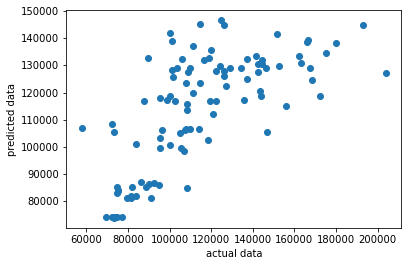

In [206]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [207]:
# R-squared:	 0.479
# mean_absolute_error= 16409.035
# mean_squared_error= 16409.035

# CONCLUSION

In [208]:
# 1. 4 models were fitted on the dataset mainly Linear regression,Random Forest,GBDT and KNN without and with Hypertparameter Tuning
# 2. Among the models the optimized Result was achieved using KNN without hyperparameter tuning
# 3. Result:
    # Model: KNN without hyperparameter tuning
    # R-squared:	 0.494
    # mean_absolute_error= 16269.572
    # mean_squared_error= 478688494.18   

In [209]:
md=[lm,rf,gbdt,knn] # Saving
import pickle
filename="Salary_prediction.pkl"
pickle.dump(md,open(filename,"wb"))